<h1>Zomato Restaurants Analysis in Banglore</h1>
<h4>The basic idea of analysing the Zomato dataset is to get a fair idea about the factors affecting the aggregate rating of each restaurant, establishment of different types of restaurant at different places, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world. With each day new restaurants opening the industry hasn’t been saturated yet and the demand is increasing day by day. In spite of increasing demand it however has become difficult for new restaurants to compete with established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don't have time to cook for themselves. With such an overwhelming demand of restaurants it has therefore become important to study the demography of a location </h4>

<h5>IMPORTING LIBRARIES</h5>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h5>IMPORTING DATASET</h5>

In [2]:
source='C:\\Users\\user\\Desktop\\zomato.xlsx'

In [3]:
df=pd.read_excel(source)

In [4]:
df.head()

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rates
0,https://www.zomato.com/bangalore/al-swaad-take...,"18, Masjid Street, Opp Akbari Masjid Neelasand...",Al Swaad Take Away,Yes,No,13,+91 7019942388\n+91 9902335220,Richmond Road,Quick Bites,NaN,"North Indian, South Indian, Arabian",350,"[('Rated 1.0', 'RATED\n If U need reasonable ...","['Beef Seekh Kabab', 'Beef BBQ Chops', 'Beef M...",Delivery,Residency Road,3.1
1,https://www.zomato.com/bangalore/the-boozy-gri...,"2nd Floor, 1st A Cross Road, Jyothi Nivas Coll...",The Boozy Griffin,No,Yes,5015,080 33512954,Koramangala 5th Block,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental","1,800","[('Rated 5.0', 'RATED\n Really great ambience...",[],Dine-out,Koramangala 6th Block,4.6
2,https://www.zomato.com/bangalore/barkat-btm-ba...,"28th, 8th Cross, Maruthi Nagar, Madiwala, BTM,...",Barkat,No,No,6,+91 9019670836,BTM,Quick Bites,NaN,Kerala,250,[],[],Dine-out,Koramangala 4th Block,3.4
3,https://www.zomato.com/bangalore/sriracha-lave...,"204, 2nd Level, 4th Floor, Comet Block, UB Cit...",Sriracha,No,No,699,+91 8041755366\n+91 7022422473,Lavelle Road,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos","1,500","[('Rated 3.0', 'RATED\n Another restaurant in...",[],Dine-out,Residency Road,4.3
4,https://www.zomato.com/bangalore/sri-ganesh-ju...,"513, Opposite Ganesh Temple, Koramangala 8th B...",Sri Ganesh Juice Junction,Yes,No,129,+91 9845623889,Koramangala 8th Block,Beverage Shop,NaN,"Juices, Fast Food",150,"[('Rated 4.0', 'RATED\n Good cafe with most v...","['Dry Fruit Milkshake', 'Wheat Grass with Wate...",Delivery,Koramangala 6th Block,3.7


In [5]:
df.tail()

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rates
41368,https://www.zomato.com/bangalore/koshys-st-mar...,"39, St. Marks Road, Bangalore",Koshy's,No,No,2332,080 22915840\n080 22213793,St. Marks Road,Casual Dining,"Coffee, Kulfi, Beef Steak, Chocolate Shake, Sa...","South Indian, North Indian, Chinese, Beverages",700,"[('Rated 4.0', 'RATED\n A place where you get...",[],Dine-out,Residency Road,3.8
41369,https://www.zomato.com/bangalore/midnight-spec...,"521, 2nd Floor, Teachers Colony, Sarjapura Rin...",Midnight Special,Yes,No,0,+91 80420780493,HSR,"Takeaway, Delivery",NaN,"North Indian, Fast Food, Chinese",500,[],[],Delivery,Koramangala 4th Block,NaN
41370,https://www.zomato.com/bangalore/sholay-the-ba...,"1, RMV 2nd Stage, 3rd Block, Chikkamaranahalli...",Sholay - The Barbeque,Yes,Yes,45,+91 7619328882,New BEL Road,Casual Dining,NaN,"North Indian, BBQ","1,200","[('Rated 2.0', 'RATED\n That building homes t...",[],Dine-out,New BEL Road,3.5
41371,https://www.zomato.com/bangalore/ghar-ka-bhoja...,"93, 1st Floor, Opoosite Venkateshwara Temple, ...",Ghar Ka Bhojan,No,No,7,+91 9945810850\n+91 9997888609,Domlur,Delivery,NaN,"North Indian, Healthy Food",200,"[('Rated 1.0', 'RATED\n Food not upto the mar...",[],Delivery,MG Road,3.3
41372,https://www.zomato.com/bangalore/sree-sagar-ba...,"8, Yarab Nagar Main Road, 2nd Stage, Banashank...",Sree Sagar,Yes,No,0,+91 9449150005,Banashankari,Quick Bites,NaN,South Indian,200,"[('Rated 3.5', ""RATED\n Visited this restaura...",[],Dine-out,Basavanagudi,NaN


<h5>Data Information and Data Description</h5>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41373 entries, 0 to 41372
Data columns (total 17 columns):
url                            41373 non-null object
address                        41373 non-null object
name                           41373 non-null object
online_order                   41373 non-null object
book_table                     41373 non-null object
votes                          41373 non-null int64
phone                          40402 non-null object
location                       41358 non-null object
rest_type                      41198 non-null object
dish_liked                     18901 non-null object
cuisines                       41341 non-null object
approx_cost(for two people)    41094 non-null object
reviews_list                   41373 non-null object
menu_item                      41373 non-null object
listed_in(type)                41373 non-null object
listed_in(city)                41373 non-null object
rates                          33392 non-nul

There are 41373 observation in 17 columns.

In [7]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'rates'],
      dtype='object')

This shows the list of columns in the given dataset

In [8]:
df.shape

(41373, 17)

it has 41373 rows and 17 columns

In [9]:
df.describe()

,votes
count,41373.000000
mean,283.771493
std,806.112459
min,0.000000
25%,7.000000
50%,41.000000
75%,200.000000
max,16832.000000


Note:-

1)as min value is 0, this means that we have restaurent with no votes.
2)we have a restaurent with highest votes count is 16832.

<h3>MISSING VALUES </h3>

In [10]:
df.isna().sum()


url                                0
address                            0
name                               0
online_order                       0
book_table                         0
votes                              0
phone                            971
location                          15
rest_type                        175
dish_liked                     22472
cuisines                          32
approx_cost(for two people)      279
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rates                           7981
dtype: int64

Note:-

The Column that has the most number of missing values is the Dish Liked column followed by rates
After Studying the data we can clearly delete the following columns as the make are not useful for our analysis "url", 'address','phone','listed_in(city)'

In [11]:
df.drop(columns=["url", 'address','phone','listed_in(city)'], inplace  =True)



<h3>Renaming the Approximate cost for two column for easier access</h3>

In [12]:
df.rename(columns={'approx_cost(for two people)': 'average_cost'}, inplace=True)

<h3>Preprocessing and visualizations</h3>

<h3>Name</h3>

In [13]:
df.name.value_counts().head()

Cafe Coffee Day      81
Onesta               62
Empire Restaurant    61
Just Bake            61
Baskin Robbins       60
Name: name, dtype: int64

Text(0.5, 1.0, 'Name vs Number of Restaurant')

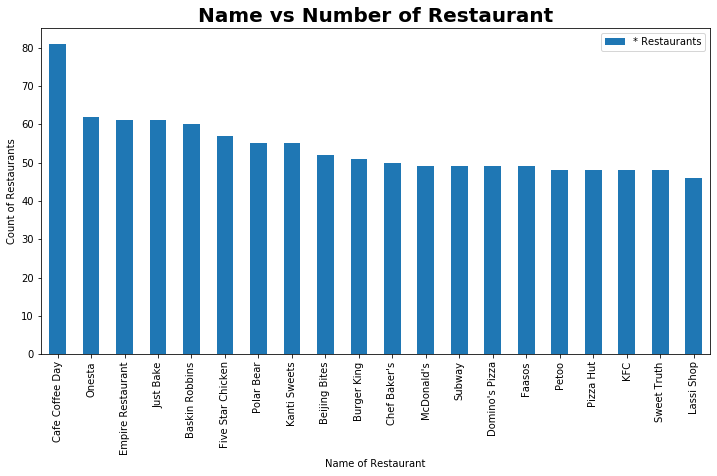

In [14]:
plt.figure(figsize = (12,6))
ax =df.name.value_counts()[:20].plot(kind = 'bar')
ax.legend(['* Restaurants'])
plt.xlabel("Name of Restaurant")
plt.ylabel("Count of Restaurants")
plt.title("Name vs Number of Restaurant",fontsize =20, weight = 'bold')

Note:-
Cafe Coffee Day has more number of Restaurents.

<h3>ONLINE ORDERS</h3>

<h4>Restaurants accepting online orders</h4>

In [15]:
df.online_order.value_counts()

Yes    24330
No     17043
Name: online_order, dtype: int64

Text(0.5, 0, 'online orders')

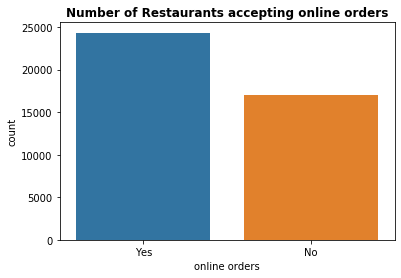

In [16]:
ax= sns.countplot(df['online_order'])
plt.title('Number of Restaurants accepting online orders', weight='bold')
plt.xlabel('online orders')

note :
most of the orders are online

<h4>Restaurants having the option of booking table</h4>


In [17]:
df['book_table'].value_counts()

No     36231
Yes     5142
Name: book_table, dtype: int64

Text(0, 0.5, 'No of restaurants')

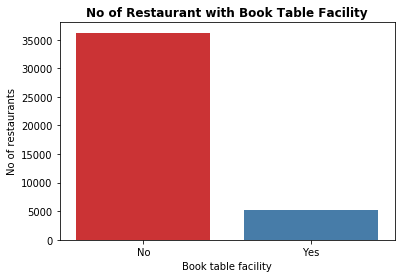

In [18]:
sns.countplot(df['book_table'], palette= "Set1")
plt.title("No of Restaurant with Book Table Facility", weight = 'bold')
plt.xlabel('Book table facility')
plt.ylabel('No of restaurants')


note: 36231 restaurents have No book table feature.

<h4>RESTAURANTS BASED LOCATION </h4>

In [19]:
df['location'].value_counts()

BTM                      4077
HSR                      2005
Koramangala 5th Block    2002
JP Nagar                 1809
Whitefield               1717
                         ... 
Nagarbhavi                  6
Yelahanka                   4
Jakkur                      2
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

Text(0.5, 1.0, 'Location')

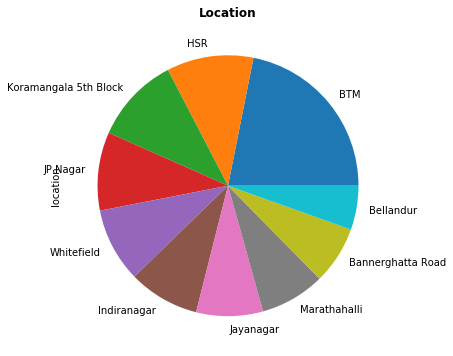

In [20]:
plt.figure(figsize=(12,6)) 
df['location'].value_counts()[:10].plot(kind = 'pie')
plt.title('Location', weight = 'bold')

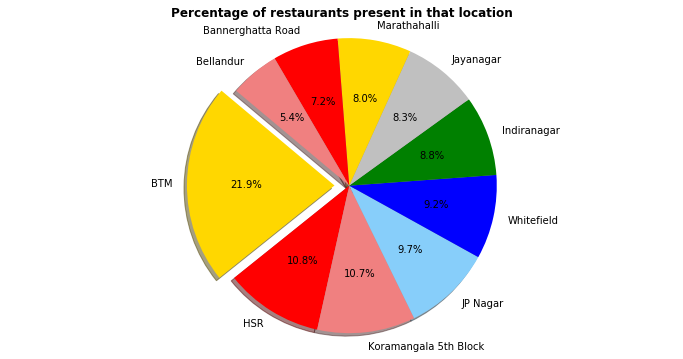

In [21]:
plt.figure(figsize = (12,6))
names = df['location'].value_counts()[:10].index
values = df['location'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that location", weight = 'bold')
plt.show()

<h4>Location Vs Count

</h4>


Text(0.5, 1.0, 'Location vs Count')

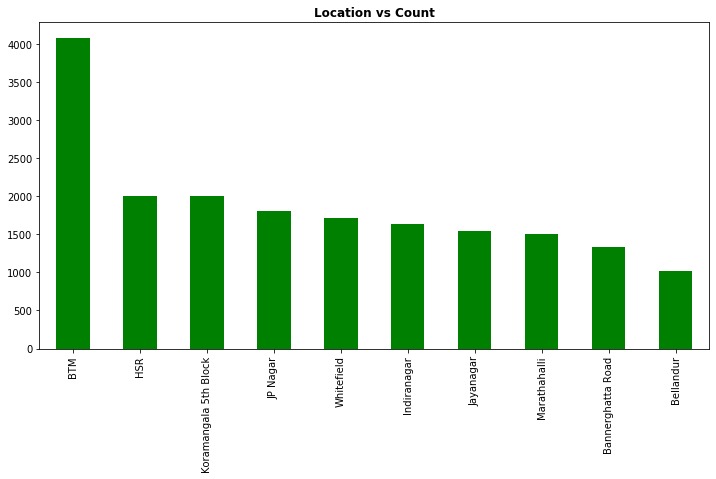

In [22]:
plt.figure(figsize = (12,6))
df['location'].value_counts()[:10].plot(kind = 'bar', color = 'g')
plt.title("Location vs Count", weight = 'bold')

In [23]:
df['location'].nunique()

93

Note:-
So we have 93 Neighbourhoods in Bangalore.
We have the highest no of restaurants in BTM.
We have the least is in Electronic city.

<h4>Restaurant type

</h4>


In [24]:
df['rest_type'].value_counts().head(10)

Quick Bites           15295
Casual Dining          8322
Cafe                   2960
Delivery               2083
Dessert Parlor         1815
Takeaway, Delivery     1634
Bakery                  913
Casual Dining, Bar      908
Beverage Shop           678
Bar                     563
Name: rest_type, dtype: int64

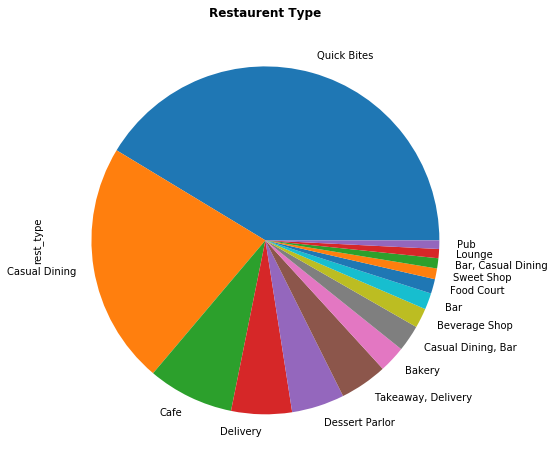

In [25]:
plt.figure(figsize = (14,8))
df.rest_type.value_counts()[:15].plot(kind = 'pie')
plt.title('Restaurent Type', weight = 'bold')
plt.show()

In [26]:
colors = ['#800080','red','#00FFFF','#FFFF00','#00FF00','#FF00FF']

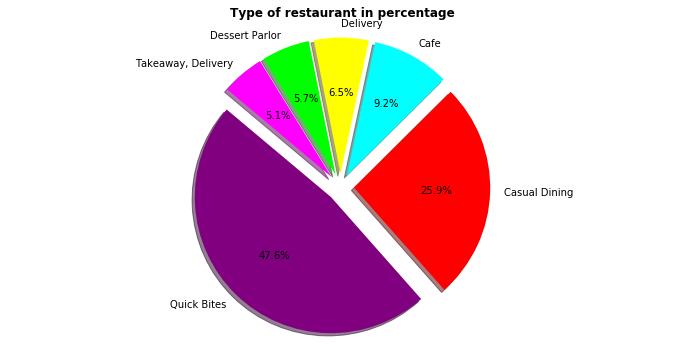

In [27]:
plt.figure(figsize = (12,6))
names = df['rest_type'].value_counts()[:6].index
values = df['rest_type'].value_counts()[:6].values
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1)  # explode 1st slice

plt.title('Type of restaurant in percentage', weight = 'bold')
plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

Note:-

We have the most frequently visited Restaurant type - Quickbites

<h4>Note:-

We have the most frequently visited Restaurant type - Quickbites</h4>

<h4>Average Cost</h4>

In [28]:
df['average_cost'].value_counts()[:20]

300      6046
400      5263
500      3975
200      3871
600      2988
250      2338
800      1823
150      1684
700      1566
350      1401
1,000    1305
450      1146
100       804
1,200     796
1,500     783
650       638
550       614
750       612
900       554
1,300     415
Name: average_cost, dtype: int64

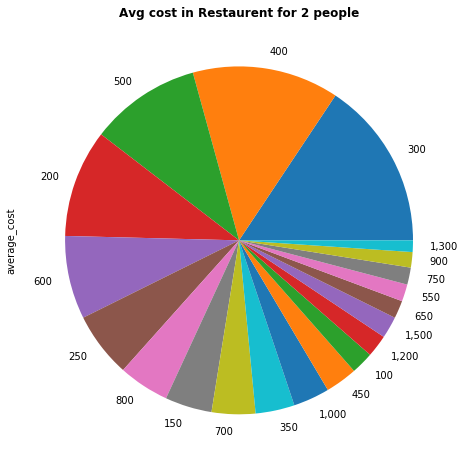

In [29]:
plt.figure(figsize = (12,8))
df['average_cost'].value_counts()[:20].plot(kind = 'pie')
plt.title('Avg cost in Restaurent for 2 people', weight = 'bold')
plt.show()


In [30]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5, 1.0, 'Average cost for 2 people in Rupees')

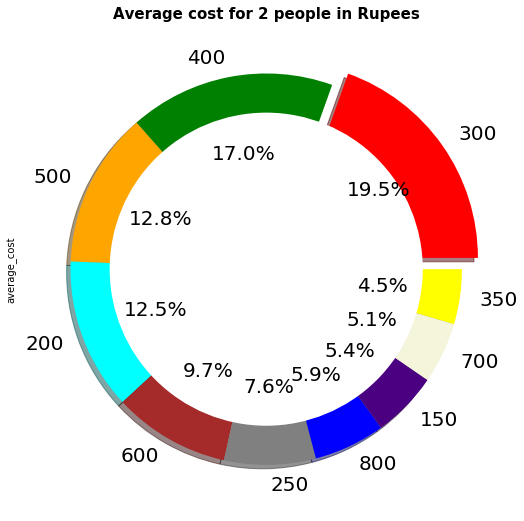

In [31]:
fig= plt.figure(figsize=(18, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = df['average_cost'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

Note:- The Average cost for two persons in Banglore is 300rupees¶

In [32]:
#lets delete the nulll values
dishes_data = df[df.dish_liked.notnull()]
dishes_data.dish_liked = dishes_data.dish_liked.apply(lambda x:x.lower().strip())

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [33]:
dishes_data.isnull().sum()

name                 0
online_order         0
book_table           0
votes                0
location             0
rest_type           56
dish_liked           0
cuisines             0
average_cost       111
reviews_list         0
menu_item            0
listed_in(type)      0
rates              144
dtype: int64

In [34]:
# count each dish to see how many times each dish repeated
dish_count = []
for i in dishes_data.dish_liked:
    for t in i.split(','):
        t = t.strip() # remove the white spaces to get accurate results
        dish_count.append(t)

Text(0, 0.5, 'Count')

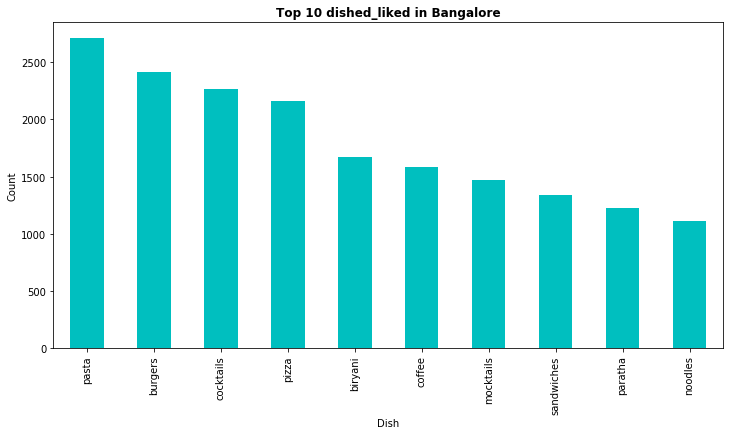

In [35]:
plt.figure(figsize=(12,6)) 
pd.Series(dish_count).value_counts()[:10].plot(kind='bar',color= 'c')
plt.title('Top 10 dished_liked in Bangalore',weight='bold')
plt.xlabel('Dish')
plt.ylabel('Count')

Note:-
The Most liked dish in Banglore is Pasta

<h4>Rate</h4>

In [36]:
df['rates'] = df['rates'].replace('NEW',np.NaN)
df['rates'] = df['rates'].replace('-',np.NaN)
df.dropna(how = 'any', inplace = True)

In [37]:
df['rates'] = df.loc[:,'rates'].replace('[ ]','',regex = True)
df['rates'] = df['rates'].astype(str)
df['rates'] = df['rates'].apply(lambda r: r.replace('/5',''))
df['rates'] = df['rates'].apply(lambda r: float(r))

3.9067233218588644


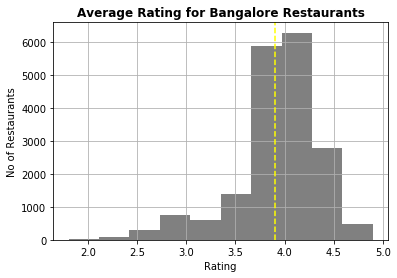

In [38]:
df.rates.hist(color='grey')
plt.axvline(x= df['rates'].mean(),ls='--',color='yellow')
plt.title('Average Rating for Bangalore Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(df['rates'].mean())

<h4>The Average rating per restaurant in Banglore is found to be 3.9</h4>

<h4>Cuisines</h4>

In [39]:
#lets delete the nulll values
cuisines_data = df[df.cuisines.notnull()]
cuisines_data.cuisines = cuisines_data.cuisines.apply(lambda x:x.lower().strip())

In [40]:
cuisines_count= []
for i in cuisines_data.cuisines:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0, 0.5, 'No of restaurants')

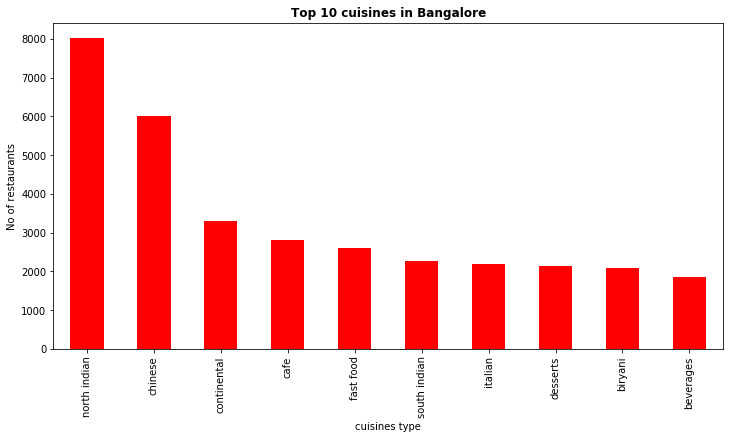

In [41]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Bangalore',weight='bold')
plt.xlabel('cuisines type')
plt.ylabel('No of restaurants')

<h4>The Most liked Cuisine in Banglore is North Indian</h4>

<h4>Rate vs Online Order</h4>

Text(0.5, 1.0, 'rate vs oline order')

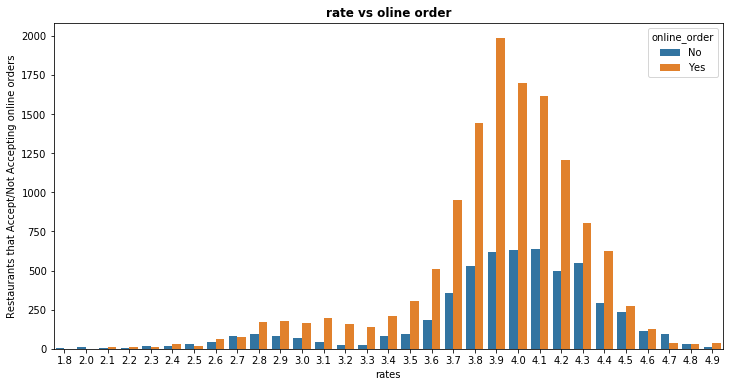

In [42]:
plt.figure(figsize = (12,6))
sns.countplot(x=df['rates'], hue = df['online_order'])
plt.ylabel("Restaurants that Accept/Not Accepting online orders")
plt.title("rate vs oline order",weight = 'bold')

<h1>INFERENCES</h1>

<li>24330 restaurants are accepting online orders
<li>36231 restaurants do not have the book table feature. #### Restaurants:-
<li>So we have 93 locations where the restaurants can be accessed through zomato in Bangalore.
<li>We have highest number of restaurants in BTM.
<li>The average cost is rs 300

</h3> The most preferred cuisine is <b>north indian<b></h3>

</h3> The most preferred dish is <b>Pasta<b></h3>

<h1>INFERENCES</h1>

In [43]:
df['online_order']= pd.get_dummies(df.online_order, drop_first=True)
df['book_table']= pd.get_dummies(df.book_table, drop_first=True)
df.head()

,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_in(type),rates
1,The Boozy Griffin,0,1,5015,Koramangala 5th Block,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental","1,800","[('Rated 5.0', 'RATED\n Really great ambience...",[],Dine-out,4.6
3,Sriracha,0,0,699,Lavelle Road,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos","1,500","[('Rated 3.0', 'RATED\n Another restaurant in...",[],Dine-out,4.3
7,Chez Nous - Novotel,0,1,125,Marathahalli,Lounge,"Coffee, Cocktails, Tiramisu, Cappuccino, Hot C...","European, French, North Indian","2,500","[('Rated 5.0', 'RATED\n I will visit there la...",[],Dine-out,3.9
8,Maxpresso,0,0,324,Koramangala 7th Block,Cafe,"Burgers, Coffee, Waffles, Mocktails, Pasta, Br...","Cafe, American, Italian, Beverages",700,"[('Rated 4.0', 'RATED\n A pretty cafe in the ...",[],Delivery,4.1
9,Hyderabadi Biryani Hub,1,0,218,BTM,Casual Dining,"Biryani, Raita","Biryani, North Indian, Chinese",600,"[('Rated 3.0', 'RATED\n My friend ordered fri...",[],Delivery,3.6


In [44]:
df.drop(columns=['dish_liked','reviews_list','menu_item','listed_in(type)'], inplace  =True)

In [45]:
df['rest_type'] = df['rest_type'].str.replace(',' , '') 
df['rest_type'] = df['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
df['rest_type'].value_counts().head()

Casual Dining        5912
Bites Quick          4203
Cafe                 1874
Bar Casual Dining    1053
Dessert Parlor        860
Name: rest_type, dtype: int64

In [46]:
df['cuisines'] = df['cuisines'].str.replace(',' , '') 
df['cuisines'] = df['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
df['cuisines'].value_counts().head()

Indian North                         933
Chinese Indian North                 690
Chinese Indian Indian North South    364
Indian South                         294
Cream Desserts Ice                   266
Name: cuisines, dtype: int64

<h1>Label Encoding</h1>

In [47]:
from sklearn.preprocessing import LabelEncoder
T = LabelEncoder()                 
df['location'] = T.fit_transform(df['location'])
df['rest_type'] = T.fit_transform(df['rest_type'])
df['cuisines'] = T.fit_transform(df['cuisines'])


In [48]:
df["average_cost"] = df["average_cost"].str.replace(',' , '') 
df["average_cost"] = df["average_cost"].astype('float')
df.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,average_cost,rates
1,The Boozy Griffin,0,1,5015,42,32,991,1800.0,4.6
3,Sriracha,0,0,699,48,29,267,1500.0,4.3
7,Chez Nous - Novotel,0,1,125,53,45,1078,2500.0,3.9
8,Maxpresso,0,0,324,44,21,45,700.0,4.1
9,Hyderabadi Biryani Hub,1,0,218,0,29,608,600.0,3.6


In [49]:
x = df.drop(['rates','name'],axis = 1)
y = df['rates']

In [50]:
x.shape


(18592, 7)

In [51]:
y.shape

(18592,)

<h1>Splitting the data for Model Building</h1>

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 33)

<h1>Standardization of values</h1>

In [53]:
#standarizing
#taking numeric values
from sklearn.preprocessing import StandardScaler
num_values1=df.select_dtypes(['float64','int64']).columns
scaler = StandardScaler()
scaler.fit(df[num_values1])
df[num_values1]=scaler.transform(df[num_values1])

In [54]:
df.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,average_cost,rates
1,The Boozy Griffin,0,1,3.945124,42,32,991,2.011102,1.626822
3,Sriracha,0,0,0.083064,48,29,267,1.435326,0.922851
7,Chez Nous - Novotel,0,1,-0.430565,53,45,1078,3.354578,-0.015777
8,Maxpresso,0,0,-0.252495,44,21,45,-0.100075,0.453537
9,Hyderabadi Biryani Hub,1,0,-0.347347,0,29,608,-0.292000,-0.719748


<h1>MODEL 1-LINEAR REGRESSION</h1>

In [63]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [64]:
lr.score(X_test, y_test)*100

20.36025701199582

<h1>MODEL 2-RANDOM FOREST</h1>

In [65]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [66]:
rfr.score(X_test,y_test)*100

86.47475959278562

<h1>MODEL 3-RIDGE REGRESSION</h1>

In [67]:
from sklearn.linear_model import Ridge
rdg = Ridge()
rdg.fit(X_train,y_train)
y_pred_rdg = rdg.predict(X_test)

In [68]:
rdg.score(X_test,y_test)*100

20.360312259850645

<h1>INSIGHTS FROM ABOVE MODEL</h1>
<table>
    <tr>
    <th>MODEL</th>
    <th>ACCURACY</th>
   </tr>
    <tr>
    <td>LINEAR REGRESSION</td>
    <td>20.36 %</td>
   </tr>
    <tr>
    <td>RANDOM FOREST</td>
    <td>87.01 %</td>
   </tr>
    <tr>
    <td>RIDGE REGRESSION</td>
    <td>20.36 %</td>
   </tr>

<h1>From the above table we see that the Random forest is performing better </h1>
<h1>Prediction for Random forest Regressor</h1>

In [71]:
Randpred = pd.DataFrame({ "actual": y_test, "pred": y_pred_rfr })
Randpred

,actual,pred
26555,4.1,4.100
884,3.7,3.805
25831,3.9,3.910
18782,3.7,3.700
6153,4.2,4.170
...,...,...
30889,4.1,4.100
17843,3.6,3.650
20908,2.8,3.060
1717,3.7,3.700
